# Animation

## 1. Counter

In [16]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML

In [23]:
fig, ax = plt.subplots()

# option 2:
text_counter = ax.text(0.5, 0.5, "TODO", size=64,
                       verticalalignment="center",
                       horizontalalignment="center")

def draw_frame(frame_num):
    #print(frame_num)
    
    # option 1: clear the axessubplot each time
    #ax.cla()
    #ax.text(0.5, 0.5, str(frame_num), size=64,
    #        verticalalignment="center", horizontalalignment="center")
    
    # option 2:
    text_counter.set_text(frame_num)

#draw_frame(4)

anim = FuncAnimation(fig, draw_frame, frames=10, interval=1000)
vid_html = anim.to_html5_video()
plt.close(fig)

#with open("example.html", "w") as f:
#    f.write(vid_html)

HTML(vid_html)

## 2. Motion of Shapes

A red ball rolling across a black platform

In [34]:
fig, ax = plt.subplots()
ax.set_aspect(1)

circ = plt.Circle((0, 0.5), 0.1, color="red")
ax.add_artist(circ)

platform = plt.Rectangle((0, 0.2), 1, 0.2, color="black")
ax.add_artist(platform)

def draw_frame(frame_num):
    x = 0.1 * frame_num
    circ.center = (x, 0.5)

anim = FuncAnimation(fig, draw_frame, frames=10, interval=100)
vid_html = anim.to_html5_video()
plt.close(fig)

HTML(vid_html)

## 3. Frames Per Seconds (fps)

In [39]:
fig, ax = plt.subplots()
ax.set_aspect(1)

circ = plt.Circle((0, 0.5), 0.1, color="red")
ax.add_artist(circ)

platform = plt.Rectangle((0, 0.2), 1, 0.2, color="black")
ax.add_artist(platform)

# IMPORTANT VARIABLES ABOUT FRAMES/TIME
fps = 30
seconds = 8
frames = fps*seconds
interval = 1/fps * 1000

def draw_frame(frame_num):
    percent = frame_num / frames # what percent of the video is done playing
    
    width = 1
    x = percent * width 
    circ.center = (x, 0.5)

anim = FuncAnimation(fig, draw_frame, frames=frames, interval=interval)
vid_html = anim.to_html5_video()
plt.close(fig)

HTML(vid_html)

## 4. Fire Department Example

In [40]:
import pandas as pd
import geopandas as gpd
import requests, re

background = gpd.read_file("https://opendata.arcgis.com/datasets/db89adb17d414649a71c0f29ea73e5bf_6.geojson")

# part 1: fetch page
url = "https://www.cityofmadison.com/fire/daily-reports"
resp = requests.get(url)
resp.raise_for_status()

In [42]:
# "right" way to search this is using a tool like BeautifulSoup
# our way: regular expressions
print(resp.text)

<!DOCTYPE html>
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head>
  <link rel="profile" href="http://www.w3.org/1999/xhtml/vocab" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta name="Generator" content="Drupal 7 (http://drupal.org)" />
<link rel="canonical" href="/fire/daily-reports" />
<link rel="shortlink" href="/node/31440" />
<meta about="/fire" typeof="skos:Concept" property="rdfs:label skos:prefLabel" content="Fire" />
<link rel="shortcut icon" href="https://www.cityofmadison.com/sites/default/files/template/favicon.ico" type="image/vnd.microsoft.icon" />
    <

In [46]:
# part 2: extract dates
dates = re.findall(r"\d{2}/\d{2}/\d{4}", resp.text)
dates = pd.to_datetime(dates)
dates

DatetimeIndex(['2022-03-29', '2022-03-28', '2022-03-26', '2022-03-26',
               '2022-03-20', '2022-03-15', '2022-03-14', '2022-03-13',
               '2022-03-10', '2022-03-03'],
              dtype='datetime64[ns]', freq=None)

In [52]:
days = (dates - dates.min()) / pd.Timedelta(days=1)
days

Float64Index([26.0, 25.0, 23.0, 23.0, 17.0, 12.0, 11.0, 10.0, 7.0, 0.0], dtype='float64')

In [53]:
# part 3: extract addresses
re.findall(r'<span itemprop="streetAddress">3200 Dairy Drive</span>', resp.text)

['<span itemprop="streetAddress">3200 Dairy Drive</span>']

In [68]:
addresses = re.findall(r'<span itemprop="streetAddress">(.+?)</span>', resp.text)[:-1]
addresses = [addr.replace(" block ", " ") + "; Madison, WI" for addr in addresses]
addresses

['3200 Dairy Drive; Madison, WI',
 '2100 East Springs Drive; Madison, WI',
 '2300 Cypress Way; Madison, WI',
 '3700 Commercial Avenue; Madison, WI',
 '1400 Williamson Street; Madison, WI',
 '5400 Raymond Road; Madison, WI',
 '300 N. Sixth Street; Madison, WI',
 '400 N. Park Street; Madison, WI',
 '6000 Driscoll Drive; Madison, WI',
 '7000 Tree Lane; Madison, WI']

In [67]:
# part 4: geocoding (addresses => lat/lon)
# Google Maps, Bing, OpenStreetMaps (nominatim)

gpd.tools.geocode(addresses[0])

,geometry,address
0,POINT (-89.29605 43.05013),"Dairy Drive, 53716, Madison, Wisconsin, United..."


In [71]:
df = gpd.tools.geocode(addresses, provider="nominatim", user_agent="cs320")
df

,geometry,address
0,POINT (-89.29605 43.05013),"Dairy Drive, Madison, Dane County, Wisconsin, ..."
1,POINT (-89.29678 43.12592),"2100, East Springs Drive, Madison, Dane County..."
2,POINT (-89.39734 43.04158),"2300, Cypress Way, Burr Oaks, Madison, Town of..."
3,POINT (-89.31781 43.10962),"3700, Commercial Avenue, Madison, Dane County,..."
4,POINT (-89.36074 43.08592),"1400, Williamson Street, Marquette, Madison, D..."
5,POINT (-89.47174 43.03194),"5400, Raymond Road, Madison, Dane County, Wisc..."
6,GEOMETRYCOLLECTION EMPTY,None
7,POINT (-89.40072 43.07339),"400, North Park Street, State-Langdon, Madison..."
8,POINT (-89.27963 43.09860),"6000, Driscoll Drive, McClellan Park, Madison,..."
9,POINT (-89.50277 43.06566),"7000, Tree Lane, Madison, Dane County, Wiscons..."


In [77]:
df["date"] = dates
df["day"] = days
df = df.dropna()
df

,geometry,address,date,day
0,POINT (-89.29605 43.05013),"Dairy Drive, Madison, Dane County, Wisconsin, ...",2022-03-29,26.0
1,POINT (-89.29678 43.12592),"2100, East Springs Drive, Madison, Dane County...",2022-03-28,25.0
2,POINT (-89.39734 43.04158),"2300, Cypress Way, Burr Oaks, Madison, Town of...",2022-03-26,23.0
3,POINT (-89.31781 43.10962),"3700, Commercial Avenue, Madison, Dane County,...",2022-03-26,23.0
4,POINT (-89.36074 43.08592),"1400, Williamson Street, Marquette, Madison, D...",2022-03-20,17.0
5,POINT (-89.47174 43.03194),"5400, Raymond Road, Madison, Dane County, Wisc...",2022-03-15,12.0
7,POINT (-89.40072 43.07339),"400, North Park Street, State-Langdon, Madison...",2022-03-13,10.0
8,POINT (-89.27963 43.09860),"6000, Driscoll Drive, McClellan Park, Madison,...",2022-03-10,7.0
9,POINT (-89.50277 43.06566),"7000, Tree Lane, Madison, Dane County, Wiscons...",2022-03-03,0.0


<AxesSubplot:>

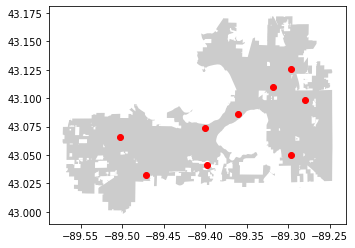

In [79]:
# part 5: static plot
fig, ax = plt.subplots()
background.plot(ax=ax, color="0.8")
df.plot(ax=ax, color="red")

In [90]:
# part 6: animation
fig, ax = plt.subplots()

def draw_frames(frame_num):
    ax.cla()
    background.plot(ax=ax, color="0.8")
    sub_df = df[df["day"] <= frame_num]
    if len(sub_df) > 0:
        sub_df.plot(ax=ax, color="red")
    
anim = FuncAnimation(fig, draw_frames, frames=26)
vid_html = anim.to_html5_video()
plt.close(fig)

HTML(vid_html)